In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flite = pd.read_excel('/content/drive/MyDrive/Flight_Price_Train.xlsx')
flite.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
flite.shape

(10683, 11)

In [ ]:
flite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
flite.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flite.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
flite.isnull().sum()
flite['Route'].fillna(flite['Route'].mode()[0], inplace=True)
flite['Total_Stops'].fillna(flite['Total_Stops'].mode()[0], inplace=True)

In [ ]:
flite.duplicated().sum()

220

In [ ]:
flite.drop_duplicates(keep='first', inplace=True)
flite.duplicated().sum()

0

In [ ]:
flite.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
flite['Date'] = flite['Date_of_Journey'].str.split('/').str[0]
flite['Month'] = flite['Date_of_Journey'].str.split('/').str[1]
flite['Year'] = flite['Date_of_Journey'].str.split('/').str[2]

In [ ]:
flite.shape

(10463, 14)

In [ ]:
flite.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
flite.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


# *a) Which airline is most preferred airline *

In [ ]:
airline_counts = flite['Airline'].value_counts()
print(airline_counts)

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


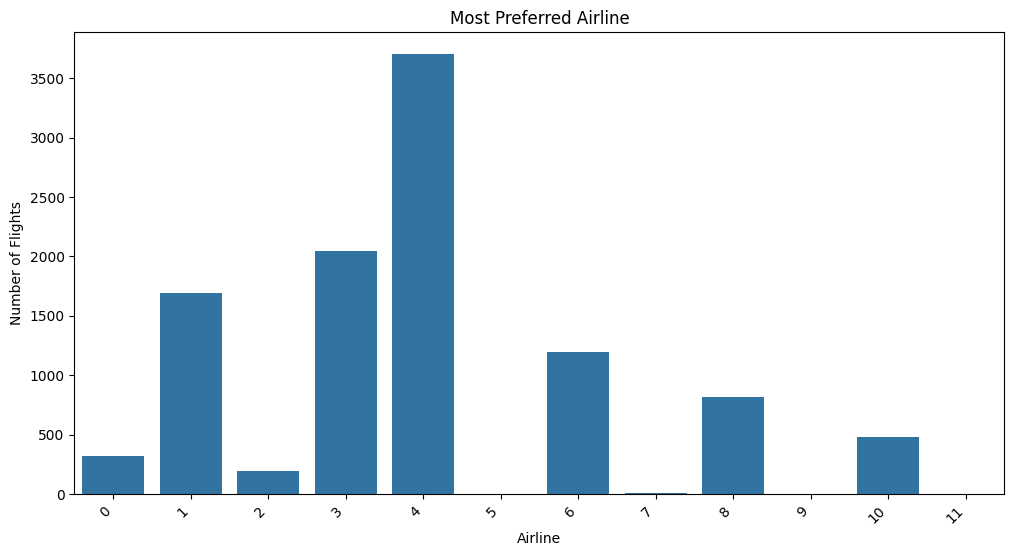

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=flite)
plt.title('Most Preferred Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()

# b) Find the majority of the flights take off from which source

In [ ]:
source_counts = flite['Source'].value_counts()
print(source_counts)

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64


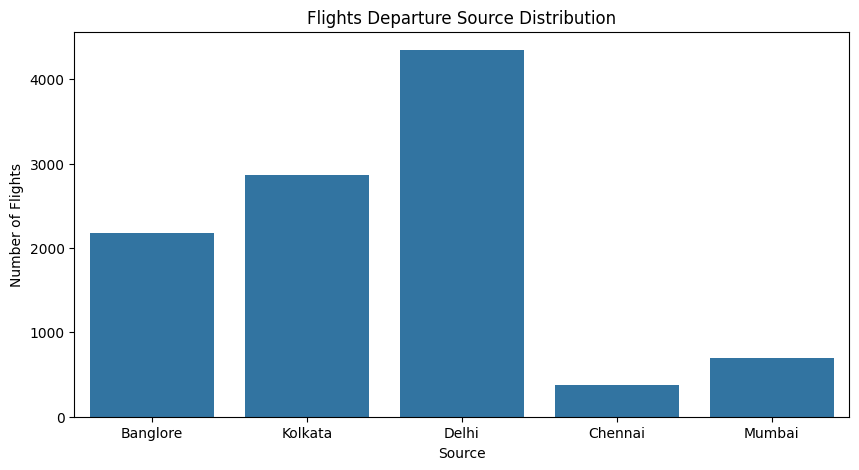

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Source', data=flite)
plt.title('Flights Departure Source Distribution')
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.show()

# c) Find maximum flights land in which destination

In [ ]:
destination_counts = flite['Destination'].value_counts()
print(destination_counts)

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


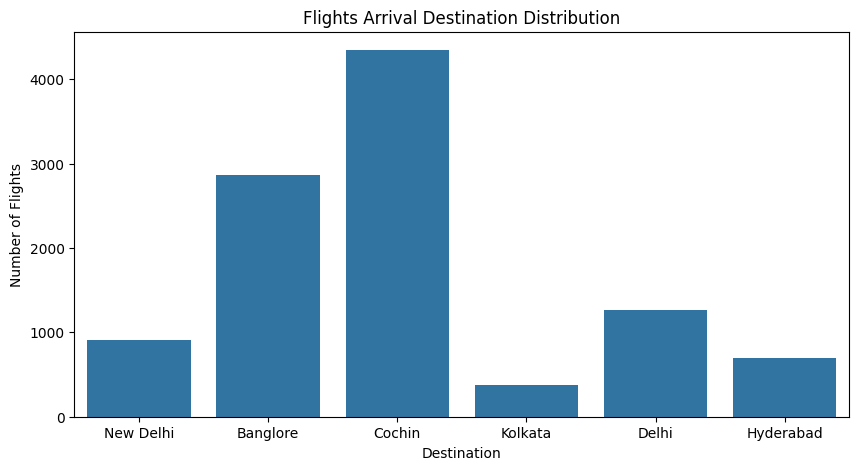

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Destination', data=flite)
plt.title('Flights Arrival Destination Distribution')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.show()

# **Check if the business class flights are high price or low and find **
**only those flights which price is higher than 50k.**

In [ ]:
airline_price = flite.groupby('Airline')['Price'].mean().sort_values(ascending=False)

In [ ]:
airline_price

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11599.021081
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9555.382891
Vistara Premium economy,8962.333333
Vistara,7801.355649
GoAir,5861.056701
IndiGo,5668.469897


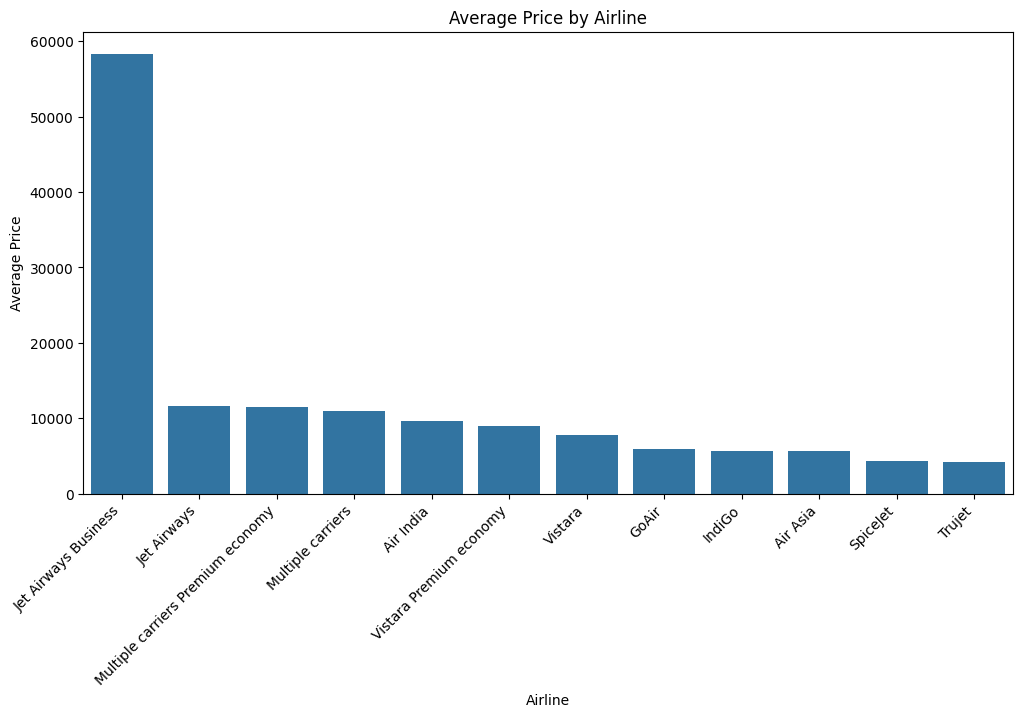

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_price.index, y=airline_price.values)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

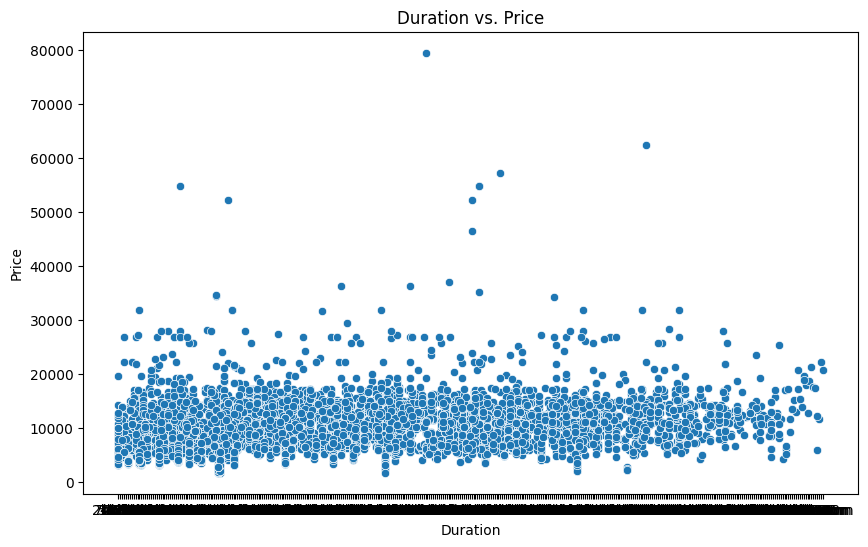

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=flite)
plt.title('Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

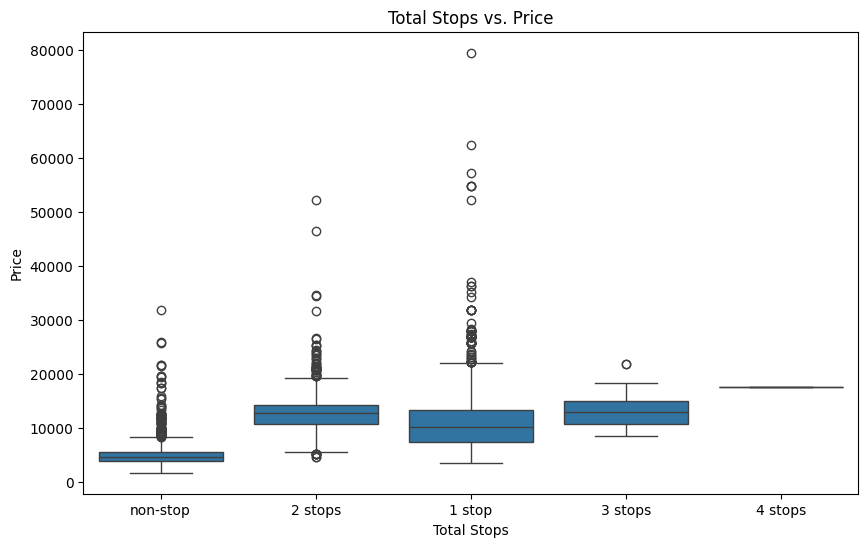

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=flite)
plt.title('Total Stops vs. Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

In [ ]:
high_price_flights = flite[flite['Price'] > 50000]
print(high_price_flights.head())

                   Airline Date_of_Journey    Source Destination  \
657   Jet Airways Business      01/03/2019  Banglore   New Delhi   
1478           Jet Airways      18/03/2019  Banglore   New Delhi   
2618           Jet Airways      18/03/2019  Banglore   New Delhi   
2924  Jet Airways Business      01/03/2019  Banglore   New Delhi   
5372  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
657   BLR → BOM → DEL    05:45         10:45       5h      1 stop   
1478  BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
2618  BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   
2924  BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
5372  BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   

     Additional_Info  Price Date Month  Year  
657          No info  52229   01    03  2019  
1478         No info  54826   18    03  2019  
2618         No info  54826   18   

# Perform encoding for the required features according to the data

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

In [ ]:
# Apply Label Encoding to categorical features
flite['Airline'] = le.fit_transform(flite['Airline'])
flite['Source'] = le.fit_transform(flite['Source'])
flite['Destination'] = le.fit_transform(flite['Destination'])
flite['Additional_Info'] = le.fit_transform(flite['Additional_Info'])
flite['Route'] = le.fit_transform(flite['Route'])
flite['Total_Stops'] = le.fit_transform(flite['Total_Stops'])
flite['Date'] = le.fit_transform(flite['Date'])
flite['Month'] = le.fit_transform(flite['Month'])
flite['Year'] = le.fit_transform(flite['Year'])
flite['Dep_Time'] = le.fit_transform(flite['Dep_Time'])
flite['Arrival_Time'] = le.fit_transform(flite['Arrival_Time'])
flite['Duration'] = le.fit_transform(flite['Duration'])

In [ ]:
flite.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,18,211,233,240,4,8,3897,9,0,0
1,1,3,0,84,31,906,336,1,8,7662,4,2,0
2,4,2,1,118,70,413,106,1,8,13882,13,3,0
3,3,3,0,91,164,1324,311,0,8,6218,5,2,0
4,3,0,5,29,149,1237,303,0,8,13302,0,0,0


In [ ]:
flite.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,3,0,5,18,211,233,240,4,8,3897,9,0,0
1,1,3,0,84,31,906,336,1,8,7662,4,2,0
2,4,2,1,118,70,413,106,1,8,13882,13,3,0
3,3,3,0,91,164,1324,311,0,8,6218,5,2,0
4,3,0,5,29,149,1237,303,0,8,13302,0,0,0



# Build multiple model by using different algorithm such as Linear  Regression, Decision Tree, and Random Forest etc. and check the performance of your model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = flite.drop('Price', axis=1)
y = flite['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8370, 12), (2093, 12), (8370,), (2093,))

In [ ]:
X_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
6615,0,2,1,103,186,512,12,0,8,13,0,0
6729,4,3,0,73,151,1325,326,0,8,7,2,0
3475,4,3,0,66,59,1261,49,0,5,7,2,0
8977,3,2,1,104,41,1217,51,0,8,6,2,0
3494,4,0,2,18,58,824,280,4,5,12,2,0


In [ ]:
y_train.head()

,Price
6615,8327
6729,14151
3475,10844
8977,7191
3494,4544


In [ ]:
linear_reg = LinearRegression()


In [ ]:
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression:
Mean Squared Error: 13230858.612178298
R-squared: 0.3658733317774048


In [ ]:

# Create and train Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("\nDecision Tree:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)


Decision Tree:
Mean Squared Error: 3228862.4108270956
R-squared: 0.8452475517467671


In [ ]:
# Create and train Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluate Random Forest model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("\nRandom Forest:")
print("Mean Squared Error:", mse_forest)
print("R-squared:", r2_forest)



Random Forest:
Mean Squared Error: 2031723.929190006
R-squared: 0.9026238308691846


In [ ]:
from sklearn.model_selection import GridSearchCV

# Compare models based on evaluation metrics
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_linear, mse_tree, mse_forest],
    'R-squared': [r2_linear, r2_tree, r2_forest]
})

print(model_results)

               Model           MSE  R-squared
0  Linear Regression  1.323086e+07   0.365873
1      Decision Tree  3.228862e+06   0.845248
2      Random Forest  2.031724e+06   0.902624


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_random_forest = grid_search.best_estimator_
y_pred_best_forest = best_random_forest.predict(X_test)
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)
r2_best_forest = r2_score(y_test, y_pred_best_forest)

print("\nTuned Random Forest:")
print("Mean Squared Error:", mse_best_forest)
print("R-squared:", r2_best_forest)



Tuned Random Forest:
Mean Squared Error: 1983348.0511554056
R-squared: 0.9049423829193282


# **"Based on the analysis, Random Forest model provides the most accurate prediction of flight prices, allowing for better pricing strategies and revenue optimization."**


In [ ]:
flite_test = pd.read_excel('/content/drive/MyDrive/Flight_Price_Test.xlsx')
flite_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
flite_test['Date'] = flite_test['Date_of_Journey'].str.split('/').str[0]
flite_test['Month'] = flite_test['Date_of_Journey'].str.split('/').str[1]
flite_test['Year'] = flite_test['Date_of_Journey'].str.split('/').str[2]

In [ ]:
flite_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [ ]:
flite_test.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
flite_test['Airline'] = le.fit_transform(flite_test['Airline'])
flite_test['Source'] = le.fit_transform(flite_test['Source'])
flite_test['Destination'] = le.fit_transform(flite_test['Destination'])
flite_test['Additional_Info'] = le.fit_transform(flite_test['Additional_Info'])
flite_test['Route'] = le.fit_transform(flite_test['Route'])
flite_test['Total_Stops'] = le.fit_transform(flite_test['Total_Stops'])
flite_test['Date'] = le.fit_transform(flite_test['Date'])
flite_test['Month'] = le.fit_transform(flite_test['Month'])
flite_test['Year'] = le.fit_transform(flite_test['Year'])
flite_test['Dep_Time'] = le.fit_transform(flite_test['Dep_Time'])
flite_test['Arrival_Time'] = le.fit_transform(flite_test['Arrival_Time'])
flite_test['Duration'] = le.fit_transform(flite_test['Duration'])

In [ ]:
flite_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,4,2,1,76,138,150,10,0,5,12,3,0
1,3,3,0,65,31,353,248,0,5,5,2,0
2,4,2,1,76,156,566,148,0,3,8,2,0
3,6,2,1,76,48,633,36,0,5,8,2,0
4,0,0,2,16,198,135,216,4,5,9,3,0


In [ ]:
categorical_features = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Route', 'Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time', 'Arrival_Time', 'Duration']
numerical_features = []

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_random_forest)  # Use the best Random Forest model from your previous training
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info', 'Route',
                                                   'Total_Stops', 'Date',
                                                   'Month', 'Year', 'Dep_Time',
                                                   'Arrival_Time',
                                                   'Duration'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, n_estimators=200,
                                       random_state=42))])

In [ ]:
y_pred_test = pipeline.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Evaluation:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Test Data Evaluation:
Mean Squared Error: 2192488.823981223
R-squared: 0.8949187143616834


# **RFM**

In [ ]:
RFM = pd.read_csv('/content/drive/MyDrive/RFM data.csv')
RFM.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
import datetime as dt

In [ ]:
RFM['InvoiceDate'] = pd.to_datetime(RFM['InvoiceDate'])

In [ ]:
# Calculate Recency
snapshot_date = RFM['InvoiceDate'].max() + dt.timedelta(days=1)
RFM['Recency'] = (snapshot_date - RFM['InvoiceDate']).dt.days

In [ ]:
# Calculate Frequency
frequency_df = RFM.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

In [ ]:
# Calculate Monetary Value
monetary_df = RFM.groupby('CustomerID')['UnitPrice'].sum().reset_index()
monetary_df.rename(columns={'UnitPrice': 'MonetaryValue'}, inplace=True)

In [ ]:
# Merge the calculated values back into the original DataFrame
RFM = pd.merge(RFM, frequency_df, on='CustomerID')
RFM = pd.merge(RFM, monetary_df, on='CustomerID')

In [ ]:
# Keep only unique customer records
RFM = RFM[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']].drop_duplicates()

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,17850.0,374,289,890.23
82,17850.0,373,289,890.23
216,17850.0,372,289,890.23
289,13047.0,374,171,671.36
306,13047.0,309,171,671.36


In [ ]:
def recency_score(x):
  if x <= 30:
    return 1
  elif x <= 60:
    return 2
  elif x <= 90:
    return 3
  elif x <= 180:
    return 4
  elif x <= 365:
    return 5
  else:
    return 5

RFM['Recency_Score'] = RFM['Recency'].apply(recency_score)
RFM.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RecencyScale,Recency_Score
0,17850.0,374,289,890.23,1,4,4,181-365 days,5
82,17850.0,373,289,890.23,1,4,4,181-365 days,5
216,17850.0,372,289,890.23,1,4,4,181-365 days,5
289,13047.0,374,171,671.36,1,4,4,181-365 days,5
306,13047.0,309,171,671.36,1,4,4,181-365 days,5


In [ ]:
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

r_groups = pd.qcut(RFM['Recency'], q=5, labels=r_labels)
f_groups = pd.qcut(RFM['Frequency'], q=5, labels=f_labels)
m_groups = pd.qcut(RFM['MonetaryValue'], q=5, labels=m_labels)

RFM = RFM.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

RFM.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RecencyScale,Recency_Score
0,17850.0,374,289,890.23,1,4,4,181-365 days,5
82,17850.0,373,289,890.23,1,4,4,181-365 days,5
216,17850.0,372,289,890.23,1,4,4,181-365 days,5
289,13047.0,374,171,671.36,1,4,4,181-365 days,5
306,13047.0,309,171,671.36,1,4,4,181-365 days,5


In [ ]:
def segment_customers(row):
  if (row['R'] >= 4 and row['R'] <= 5) and (row['F'] >= 4 and row['F'] <= 5) and (row['M'] >= 4 and row['M'] <= 5):
    return 'Champions'
  elif (row['R'] >= 3 and row['R'] <= 5) and (row['F'] >= 3 and row['F'] <= 5) and (row['M'] >= 3 and row['M'] <= 5):
    return 'Loyal Customers'
  elif (row['R'] >= 4 and row['R'] <= 5) and (row['F'] >= 2 and row['F'] <= 3) and (row['M'] >= 2 and row['M'] <= 3):
    return 'Potential Loyalist'
  elif (row['R'] >= 4 and row['R'] <= 5) and (row['F'] >= 1 and row['F'] <= 2) and (row['M'] >= 1 and row['M'] <= 2):
    return 'Recent Customers'
  elif (row['R'] >= 4 and row['R'] <= 5) and (row['F'] >= 1 and row['F'] <= 2) and (row['M'] >= 1 and row['M'] <= 2):
    return 'Promising'
  elif (row['R'] >= 3 and row['R'] <= 5) and (row['F'] >= 3 and row['F'] <= 5) and (row['M'] >= 3 and row['M'] <= 5):
    return 'Needs Attention'
  else:
    return 'About to Sleep'

RFM['Segment'] = RFM.apply(segment_customers, axis=1)
print(RFM.head())

     CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RecencyScale  \
0       17850.0      374        289         890.23  1  4  4  181-365 days   
82      17850.0      373        289         890.23  1  4  4  181-365 days   
216     17850.0      372        289         890.23  1  4  4  181-365 days   
289     13047.0      374        171         671.36  1  4  4  181-365 days   
306     13047.0      309        171         671.36  1  4  4  181-365 days   

     Recency_Score         Segment  
0                5  About to Sleep  
82               5  About to Sleep  
216              5  About to Sleep  
289              5  About to Sleep  
306              5  About to Sleep  


a) Visualize the RFM segments.

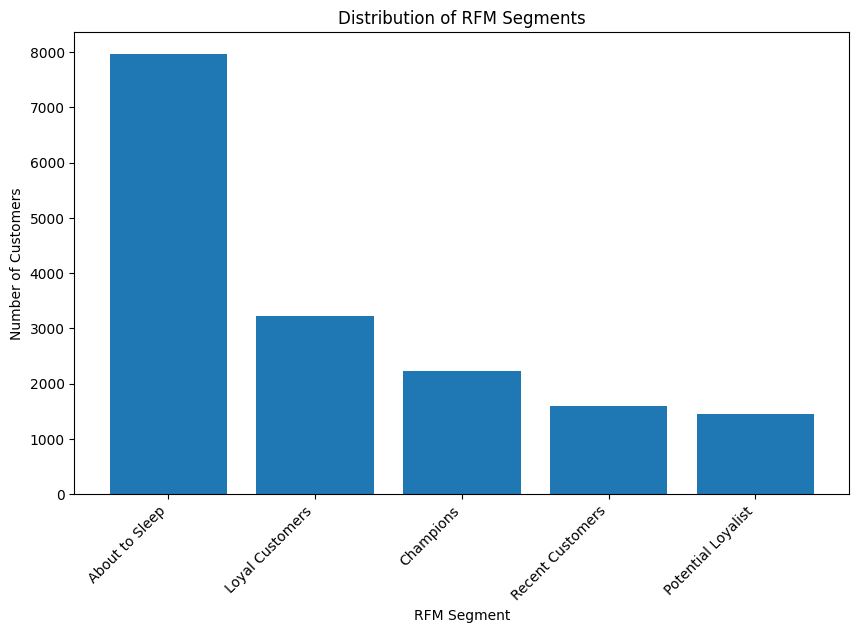

In [ ]:
# Count the number of customers in each segment
segment_counts = RFM['Segment'].value_counts()

# Create a bar chart to visualize the segment distribution
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of RFM Segments')
plt.xticks(rotation=45, ha='right')
plt.show()

# Conclude your findings of RFM analysis and suggest some strategies on it.

In [ ]:
# About to Sleep Customers:
# These customers are at risk of churning. Strategies to re-engage them include:
# - Personalized email campaigns highlighting relevant products or promotions.
# - Exclusive discounts or offers to incentivize them to return.
# - Targeted advertisements on social media or other platforms.
# - Reactivation campaigns with special offers or product recommendations.

In [ ]:
# 1. Champions and Loyal Customers are valuable and should be retained with loyalty programs and exclusive offers.
# 2. Potential Loyalists and Promising customers should be targeted with onboarding campaigns and incentives to encourage repeat purchases.
# 3. Customers in the "Needs Attention" segment require reactivation strategies, such as personalized promotions or product recommendations.
# 4. "About to Sleep" customers are at risk of churn. Targeted campaigns with discounts or exclusive offers can be used to re-engage them.
# 5. Understanding customer segments allows for tailored marketing efforts and improved customer retention